# CS 122 Spring 2025 HW 6

## Handling Complicate Data

You are tasked to generate a report on students' Math and English performance for SJSU High School. Here are three data files:

- Students Info: https://www.sjsu.edu/people/wendy.lee/docs/CS122/data/sjsu.csv
- Math scores: https://www.sjsu.edu/people/wendy.lee/docs/CS122/data/math_scores.csv
- English scores: https://www.sjsu.edu/people/wendy.lee/docs/CS122/data/english_scores.csv

The data might need some cleaning before you can use them. Missing values should be converted to NaN in the read csv step.

# Q1. Clean and Merge data
You will need to use Pandas to read the CSV files and load the data into three separate DataFrames. Merge the Math scores and English scores with the DataFrame that contains students' information. You want to retain all the students' information.

**Hint**: You might need to remove lines that are not needed in the csv files using the `read_csv` parameters `skiprows`, `skipfooter`. You might also replace words representing missing values using the parameter `na_values`.

This is how the resulting data frame should look like:

<img src="https://www.sjsu.edu/people/wendy.lee/pics/CS122/students_scores.png" width=500>

#Question 1

In [ ]:
import pandas as pd
students = "https://www.sjsu.edu/people/wendy.lee/docs/CS122/data/sjsu.csv"

students_data = pd.read_csv(students, skiprows = 3, skipfooter=1, engine  = 'python')
students_data




,#Student_ID,Name,Age,Gender,Grade
0,3923,Alice,17,F,11
1,6023,Bob,16,M,11
2,1262,Charlie,18,M,12
3,8325,Camryn,17,F,12
4,1352,Diana,17,F,11
5,2643,Jocyln,15,F,10
6,2532,Andrew,16,M,11
7,7235,Hope,15,F,10
8,2743,Rogue,18,M,12


In [ ]:
import pandas as pd

math_scores = "https://www.sjsu.edu/people/wendy.lee/docs/CS122/data/math_scores.csv"

math_data = pd.read_csv(math_scores, na_values = '-')

math_data


,ID,Score
0,3923,85.0
1,1352,90.0
2,6023,88.0
3,2643,92.0
4,1262,NaN
5,2641,95.0
6,2532,NaN
7,8325,99.0
8,7235,89.0
9,2743,NaN


In [ ]:
english_scores = "https://www.sjsu.edu/people/wendy.lee/docs/CS122/data/english_scores.csv"
english_data = pd.read_csv(english_scores, skiprows = 2, na_values = 'None')
english_data

,SJSU_ID,Score
0,6023,81.0
1,3923,87.0
2,8325,62.0
3,1352,90.0
4,2532,67.0
5,2641,99.0
6,2743,87.0
7,1262,NaN
8,2643,95.0
9,7235,84.0


In [ ]:
import pandas as pd
pd_merge = pd.merge(students_data, math_data, left_on = '#Student_ID', right_on = 'ID', how = 'left')
pd_merge2 = pd.merge(pd_merge, english_data, left_on = "#Student_ID", right_on ="SJSU_ID", how = 'left')

pd_merge2

,#Student_ID,Name,Age,Gender,Grade,ID,Score_x,SJSU_ID,Score_y
0,3923,Alice,17,F,11,3923,85.0,3923,87.0
1,6023,Bob,16,M,11,6023,88.0,6023,81.0
2,1262,Charlie,18,M,12,1262,NaN,1262,NaN
3,8325,Camryn,17,F,12,8325,99.0,8325,62.0
4,1352,Diana,17,F,11,1352,90.0,1352,90.0
5,2643,Jocyln,15,F,10,2643,92.0,2643,95.0
6,2532,Andrew,16,M,11,2532,NaN,2532,67.0
7,7235,Hope,15,F,10,7235,89.0,7235,84.0
8,2743,Rogue,18,M,12,2743,NaN,2743,87.0


In [ ]:
import pandas as pd

pd_merge2.drop(columns=['ID', 'SJSU_ID'], inplace = True)
pd_merge2.rename(columns={"#Student_ID": "Student_ID", "Score_x": "Math", "Score_y": "English"}, inplace=True)
pd_merge2

,Student_ID,Name,Age,Gender,Grade,Math,English
0,3923,Alice,17,F,11,85.0,87.0
1,6023,Bob,16,M,11,88.0,81.0
2,1262,Charlie,18,M,12,NaN,NaN
3,8325,Camryn,17,F,12,99.0,62.0
4,1352,Diana,17,F,11,90.0,90.0
5,2643,Jocyln,15,F,10,92.0,95.0
6,2532,Andrew,16,M,11,NaN,67.0
7,7235,Hope,15,F,10,89.0,84.0
8,2743,Rogue,18,M,12,NaN,87.0


#Q2. Create a New Categorical Column in the Dataframe


Here is an example of using values from one column to create categorical values for a new column in the same dataframe

In [ ]:
import pandas as pd

# Sample data
data = {
    'Score': [85, 90, 75, 60, 95, 80],
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Score
0,85
1,90
2,75
3,60
4,95
5,80


In [ ]:
# Define a function to categorize scores
def categorize_score(score):
    if score >= 90:
        return 'Excellent'
    elif score >= 80:
        return 'Good'
    elif score >= 70:
        return 'Average'
    else:
        return 'Below Average'

# Apply the function to create a new column 'Grade'
df['Grade'] = df['Score'].apply(categorize_score)

# Displaying the DataFrame with the new column
df

,Score,Grade
0,85,Good
1,90,Excellent
2,75,Average
3,60,Below Average
4,95,Excellent
5,80,Good


## Your turn: Create a new column, `Year`, in the merged dataframe and set the category based on the students' grade level:
|Grade level| Year |
|:-:|:-|
|10 | Sophomore|
|11 | Junior |
|12 | Senior |

The resulting dataframe should look like this:

<img src="https://www.sjsu.edu/people/wendy.lee/pics/CS122/students_years.png" width=500>

#Question 2

In [ ]:
import pandas as pd

# Sample data
data = {
    'grade_level': [10,11,12],
}

# Create DataFrame
df = pd.DataFrame(data)
df

,grade_level
0,10
1,11
2,12


In [ ]:
def categorize_level(grade_level):
    if grade_level == 10:
        return 'Sophomore'
    elif grade_level == 11:
        return 'Junior'
    elif grade_level == 12:
        return 'Senior'
    else:
        return 'NA'

# Apply the function to create a new column 'Grade'
pd_merge2['Year'] = pd_merge2['Grade'].apply(categorize_level)

# Displaying the DataFrame with the new column
pd_merge2

,Student_ID,Name,Age,Gender,Grade,Math,English,Year
0,3923,Alice,17,F,11,85.0,87.0,Junior
1,6023,Bob,16,M,11,88.0,81.0,Junior
2,1262,Charlie,18,M,12,NaN,NaN,Senior
3,8325,Camryn,17,F,12,99.0,62.0,Senior
4,1352,Diana,17,F,11,90.0,90.0,Junior
5,2643,Jocyln,15,F,10,92.0,95.0,Sophomore
6,2532,Andrew,16,M,11,NaN,67.0,Junior
7,7235,Hope,15,F,10,89.0,84.0,Sophomore
8,2743,Rogue,18,M,12,NaN,87.0,Senior


#Q3. Use groupby and agg to show the mean score of Math and English group by Year and Gender.

Your results should look like this:  
<img src="https://www.sjsu.edu/people/wendy.lee/pics/CS122/scores_by_gender_and_year.png" width=300>

Here is the <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html'>Documentation</a> on how to use `groupby` and `agg` with a pandas dataframe

# Question 3

In [ ]:
# Q3. Group by Gender and Year and aggregate using mean
# Your code here  . .

import pandas as pd

grouped_data = pd_merge2.groupby(['Gender','Year'])[['Math', 'English']].agg('mean')

# Display the grouped DataFrame
grouped_data

Math  English
Gender Year                    
F      Junior     87.5     88.5
       Senior     99.0     62.0
       Sophomore  90.5     89.5
M      Junior     88.0     74.0
       Senior      NaN     87.0

#Q4 Create a boxplot using Seaborn `catplot` to show the distribution of Math scores and English scores for each Year and use `hue` to separate the boxplot by Gender

Hint: Use the dataframe from Q2 and reshape it into tidy form. Your tidy DataFrame should look like this:

<img src="https://www.sjsu.edu/people/wendy.lee/pics/CS122/students_tidyform.png" width=500>

The boxplot should look like this:

<img src="https://www.sjsu.edu/people/wendy.lee/pics/CS122/students_performance.png" width=800>



# Question 4

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reshape the data: combine Math and English scores into one column with corresponding subject labels
long_data = pd.melt(pd_merge2, id_vars=["Student_ID", "Name", "Age", "Gender", "Year", "Grade"], value_vars=["Math", "English"],
                    var_name="Subject", value_name="Score")

long_data

,Student_ID,Name,Age,Gender,Year,Grade,Subject,Score
0,3923,Alice,17,F,Junior,11,Math,85.0
1,6023,Bob,16,M,Junior,11,Math,88.0
2,1262,Charlie,18,M,Senior,12,Math,NaN
3,8325,Camryn,17,F,Senior,12,Math,99.0
4,1352,Diana,17,F,Junior,11,Math,90.0
5,2643,Jocyln,15,F,Sophomore,10,Math,92.0
6,2532,Andrew,16,M,Junior,11,Math,NaN
7,7235,Hope,15,F,Sophomore,10,Math,89.0
8,2743,Rogue,18,M,Senior,12,Math,NaN
9,3923,Alice,17,F,Junior,11,English,87.0


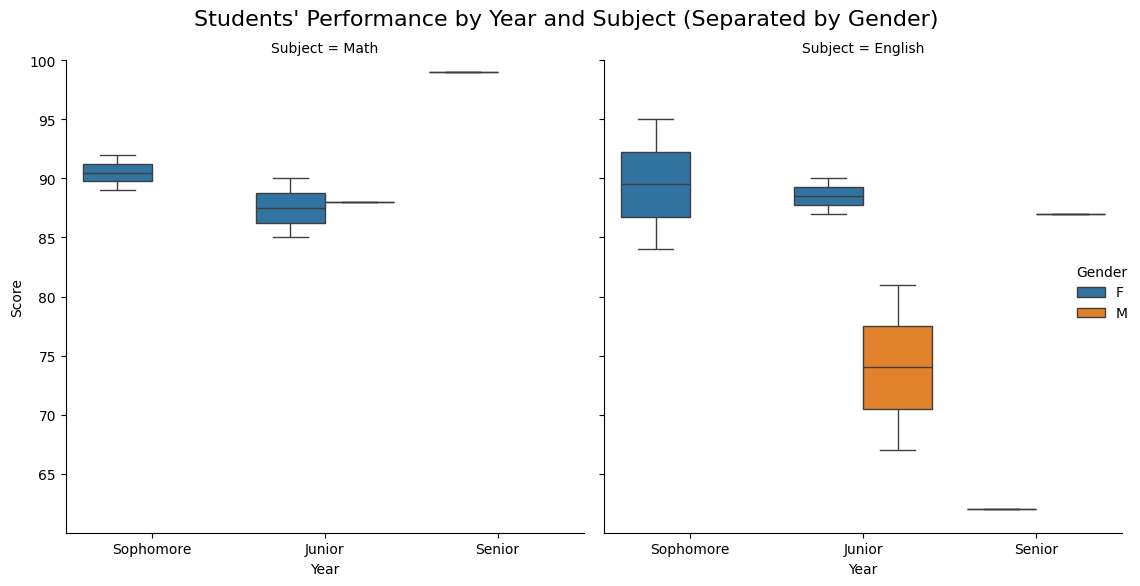

In [ ]:
# Ensure 'Year' column is ordered as Sophomore -> Junior -> Senior
ordered_categories = ["Sophomore", "Junior", "Senior"]
pd_merge2["Year"] = pd.Categorical(pd_merge2["Year"], categories=ordered_categories, ordered=True)


# Create a catplot with boxplots for both subjects, separated by Year and Gender
g = sns.catplot(
    data=long_data,
    x="Year",
    y="Score",
    hue="Gender",
    col="Subject",
    kind="box",
    order=ordered_categories,
    height=6,
    aspect=0.9
)

# Set y-axis limits and ticks
g.set(ylim=(60, 100))
g.set(yticks=[65, 70, 75, 80, 85, 90, 95, 100])

# Set titles for each subplot (Subject = Math, Subject = English)
g.set_titles("Subject = {col_name}")

# Add a main title to the entire figure
g.fig.suptitle('Students\' Performance by Year and Subject (Separated by Gender)', y=0.97, fontsize=16)

# Adjust legend position
g._legend.set_title('Gender')

plt.tight_layout()

plt.show()
